<a href="https://colab.research.google.com/github/pasquale90/mthesis/blob/master/additional/Parameters_experiment%5Besc50%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!pip uninstall librosa

In [0]:
!pip install librosa

In [0]:
!pip list

In [0]:
#Imports
import os
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math
from PIL import Image

In [0]:
#Read the contents 
audio_path='/content/gdrive/My Drive/dissertation/ESC-50-master/audio/'
audio_files=os.listdir(audio_path)
print ('audiofiles length = {}'.format(len(audio_files)))

audiofiles length = 2000


In [0]:
#chose proper window 
#https://stackoverflow.com/questions/56911774/mfcc-feature-extraction-librosa/56912690#56912690

In [0]:
def extract_mel_spectogram(audio_path,filename,sr,window_size,overlap,nfft,nmels):
  data,fs=librosa.load(path=audio_path+filename,sr=sr,mono=True)
  S=librosa.feature.melspectrogram(y=data.astype(float),
                                   sr=fs,S=None,
                                   n_fft=nfft,
                                   win_length=window_size, 
                                   window='hann', 
                                   hop_length=overlap, 
                                   power=2,
                                   n_mels=nmels) 
  log_S = librosa.power_to_db(S, ref=np.max)
  return log_S

In [0]:
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  
  return spec_scaled

In [0]:
def save_spec(path,name,spec):
  image = Image.fromarray(spec) 
  image.save(path+name)

In [0]:
def read_image(path,name):#print_info too
  image=Image.open(path+name)
  display(image)
  image=np.array(image)
  
  print(name)
  print(image.shape)
  print(type(image))
  print(image)
  return image

In [0]:
#Parameters
params=np.array([[44100, 1024, 512,  256],
                 [44100, 1024, 1024, 512], 
                 [44100, 2048, 1024, 512], #alternative window
                 [44100, 2048, 2048, 512], #Chosen window
                 [44100, 2048, 2048, 1024], 
                 [22050, 512, 512, 256], 
                 [22050, 1024, 512, 256],
                 [22050, 1024, 1024, 512],
                 [22050, 2048, 1024, 256],
                 [22050, 2048, 2048, 512]
                ])

experiments = pd.DataFrame(params,index=['exp1', 'exp2', 'exp3','exp4','exp5',
                                         'exp6', 'exp7', 'exp8','exp9','exp10'],
                           columns=['Sample rate','FFT points','Window Size', 'Overlap'])
print(experiments)

       Sample rate  FFT points  Window Size  Overlap
exp1         44100        1024          512      256
exp2         44100        1024         1024      512
exp3         44100        2048         1024      512
exp4         44100        2048         2048      512
exp5         44100        2048         2048     1024
exp6         22050         512          512      256
exp7         22050        1024          512      256
exp8         22050        1024         1024      512
exp9         22050        2048         1024      256
exp10        22050        2048         2048      512


In [0]:
csvpath='/content/gdrive/My Drive/dissertation/ESC-50-master/meta/esc50.csv'
esc50=pd.read_csv(csvpath)
esc50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB


In [0]:
classes = np.unique(esc50['category'])
print(classes[0:10])

['airplane' 'breathing' 'brushing_teeth' 'can_opening' 'car_horn' 'cat'
 'chainsaw' 'chirping_birds' 'church_bells' 'clapping']


In [0]:
def plot_experiments(path, melspectograms, name):
  image=read_image_exp(path,name)
  plt.ioff()
  fig = plt.figure(frameon=False)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  ax.set_title(name, y=1.08)
  ax.imshow(image, cmap='gray', aspect='auto')
  plt.close(fig)

def define_imagename_exp(wavname,exp):
  imagename=wavname.split('.')[0]+'_'+exp+'.png'
  return imagename

def read_image_exp(path,name):#print_info too
  image=Image.open(path+name)
  display(image)
  image=np.array(image)
  return image

In [0]:
!mkdir /content/exp
!mkdir /content/exp/80
!mkdir /content/exp/128

Class: airplane, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


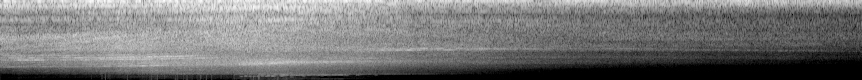

Class: airplane, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


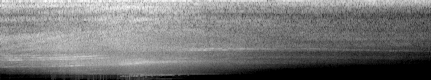

Class: airplane, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


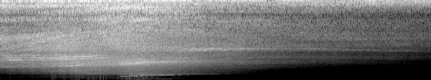

Class: airplane, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


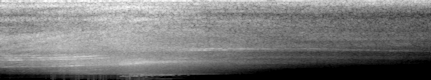

Class: airplane, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


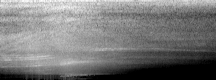

Class: airplane, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


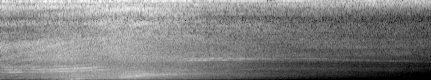

Class: airplane, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


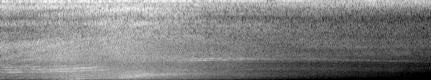

Class: airplane, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


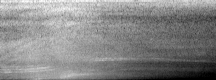

Class: airplane, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


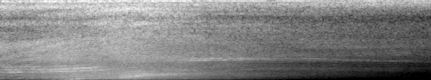

Class: airplane, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


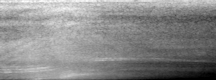

Class: breathing, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


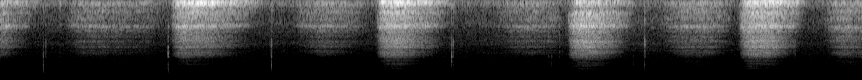

Class: breathing, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


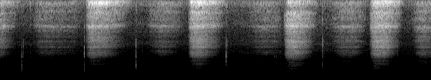

Class: breathing, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


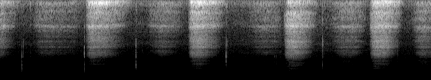

Class: breathing, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


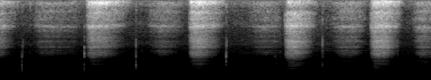

Class: breathing, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


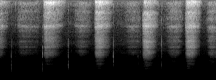

Class: breathing, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


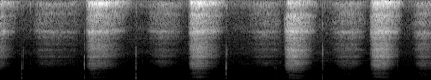

Class: breathing, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


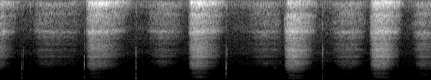

Class: breathing, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


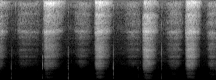

Class: breathing, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


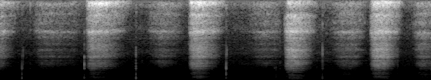

Class: breathing, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


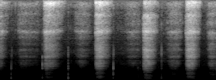

Class: brushing_teeth, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


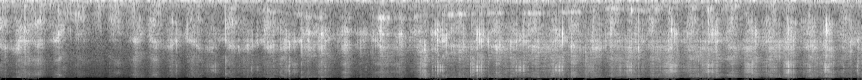

Class: brushing_teeth, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


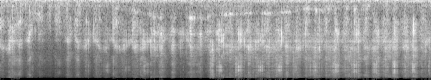

Class: brushing_teeth, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


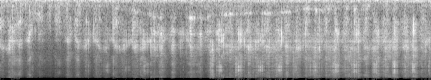

Class: brushing_teeth, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


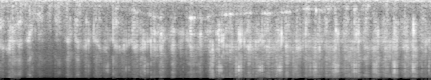

Class: brushing_teeth, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


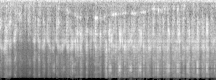

Class: brushing_teeth, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


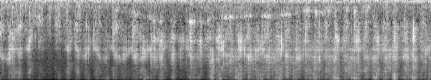

Class: brushing_teeth, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


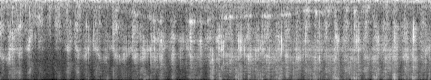

Class: brushing_teeth, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


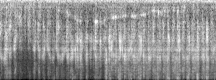

Class: brushing_teeth, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


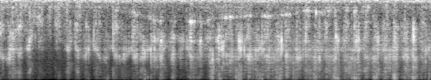

Class: brushing_teeth, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


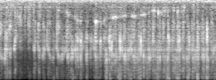

Class: can_opening, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


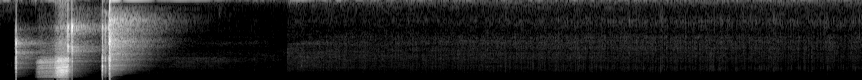

Class: can_opening, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


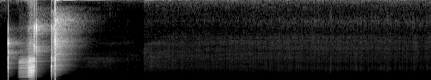

Class: can_opening, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


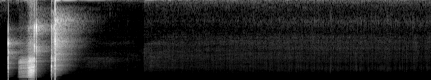

Class: can_opening, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


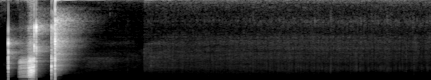

Class: can_opening, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


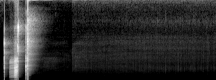

Class: can_opening, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


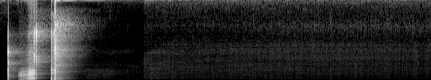

Class: can_opening, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


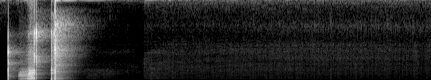

Class: can_opening, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


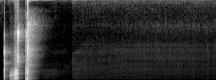

Class: can_opening, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


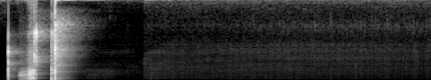

Class: can_opening, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


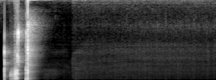

Class: car_horn, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


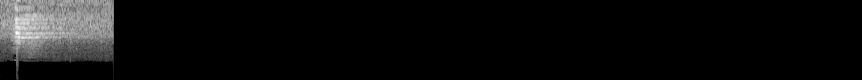

Class: car_horn, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


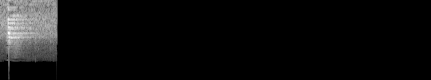

Class: car_horn, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


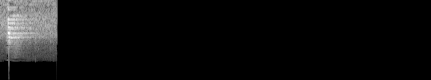

Class: car_horn, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


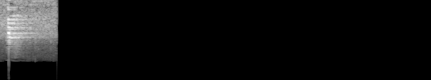

Class: car_horn, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


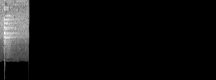

Class: car_horn, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


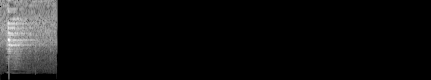

Class: car_horn, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


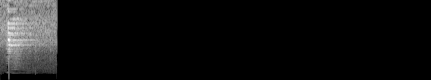

Class: car_horn, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


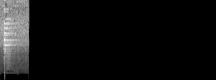

Class: car_horn, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


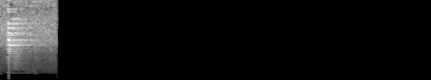

Class: car_horn, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


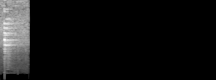

Class: cat, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


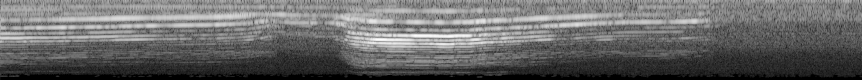

Class: cat, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


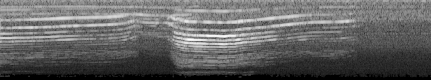

Class: cat, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


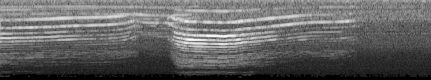

Class: cat, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


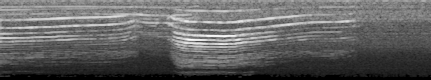

Class: cat, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


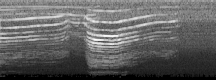

Class: cat, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


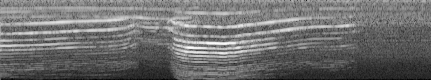

Class: cat, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


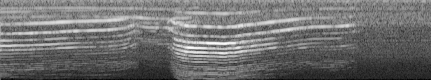

Class: cat, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


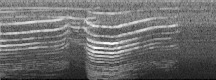

Class: cat, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


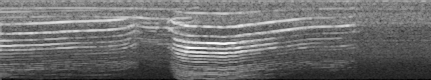

Class: cat, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


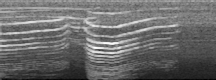

Class: chainsaw, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


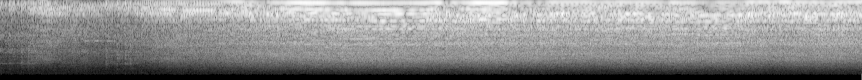

Class: chainsaw, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


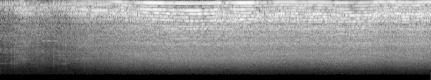

Class: chainsaw, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


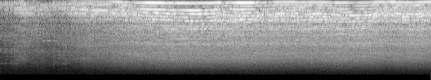

Class: chainsaw, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


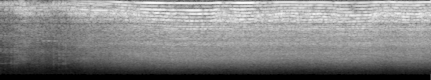

Class: chainsaw, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


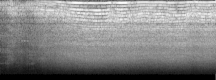

Class: chainsaw, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


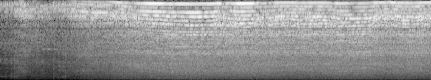

Class: chainsaw, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


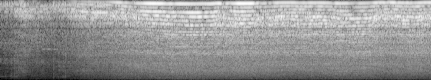

Class: chainsaw, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


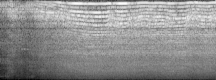

Class: chainsaw, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


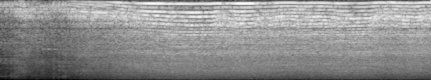

Class: chainsaw, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


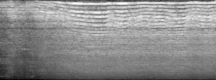

Class: chirping_birds, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


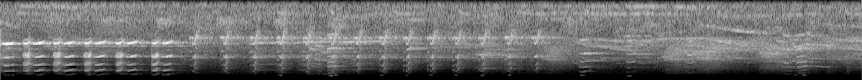

Class: chirping_birds, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


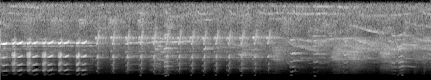

Class: chirping_birds, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


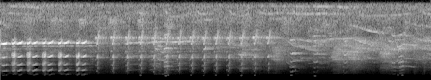

Class: chirping_birds, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


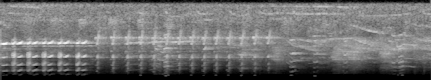

Class: chirping_birds, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


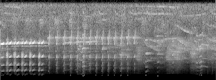

Class: chirping_birds, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


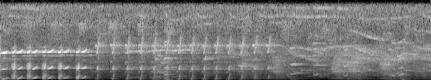

Class: chirping_birds, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


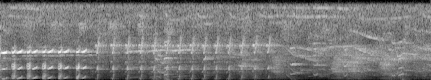

Class: chirping_birds, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


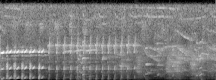

Class: chirping_birds, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


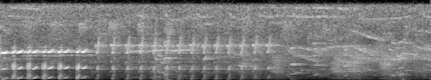

Class: chirping_birds, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


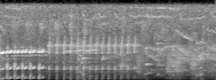

Class: church_bells, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


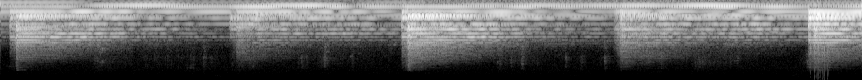

Class: church_bells, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


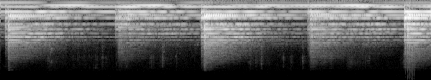

Class: church_bells, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


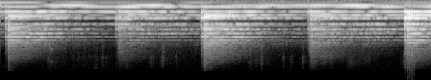

Class: church_bells, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


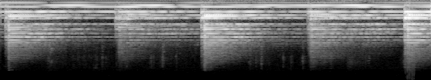

Class: church_bells, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


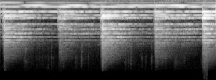

Class: church_bells, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


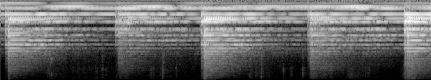

Class: church_bells, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


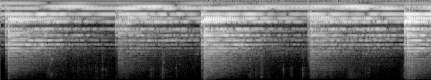

Class: church_bells, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


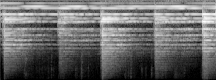

Class: church_bells, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


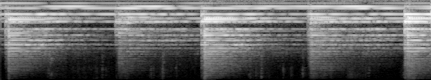

Class: church_bells, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


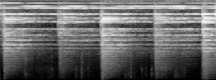

Class: clapping, experiment_no: exp1, shape: (80, 862), parameters=[44100, 1024, 512, 256]


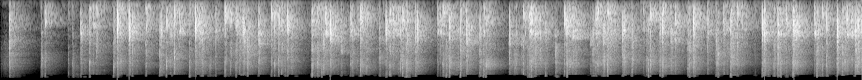

Class: clapping, experiment_no: exp2, shape: (80, 431), parameters=[44100, 1024, 1024, 512]


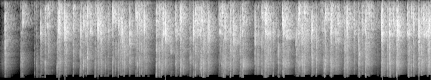

Class: clapping, experiment_no: exp3, shape: (80, 431), parameters=[44100, 2048, 1024, 512]


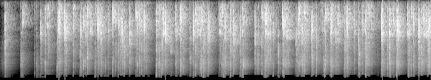

Class: clapping, experiment_no: exp4, shape: (80, 431), parameters=[44100, 2048, 2048, 512]


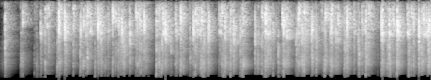

Class: clapping, experiment_no: exp5, shape: (80, 216), parameters=[44100, 2048, 2048, 1024]


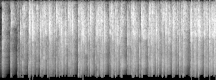

Class: clapping, experiment_no: exp6, shape: (80, 431), parameters=[22050, 512, 512, 256]


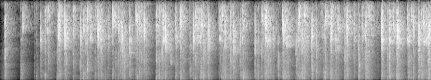

Class: clapping, experiment_no: exp7, shape: (80, 431), parameters=[22050, 1024, 512, 256]


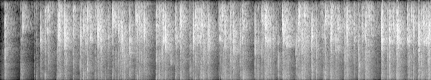

Class: clapping, experiment_no: exp8, shape: (80, 216), parameters=[22050, 1024, 1024, 512]


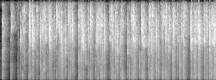

Class: clapping, experiment_no: exp9, shape: (80, 431), parameters=[22050, 2048, 1024, 256]


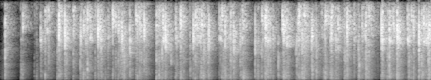

Class: clapping, experiment_no: exp10, shape: (80, 216), parameters=[22050, 2048, 2048, 512]


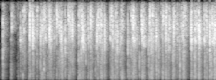

In [0]:
#Main_nmels = 80
nmels=80# |128 
experiment_path='/content/exp/'
folder=str(nmels)
experiment_path=experiment_path+folder+'/'


for c in classes[0:10]:
  afn = esc50['filename'].loc[esc50['category']==c].iloc[0] #get the first file of the first 10 categories

  for exp in experiments.index:
    sr, nfft, window_size, overlap = experiments.loc[exp] 
    parameters=[sr, nfft, window_size, overlap]     
    image_name=define_imagename_exp(afn,exp)

    spectogram=extract_mel_spectogram(audio_path,afn,sr,window_size,overlap,nfft,nmels)
    image=spec_to_image(spectogram, eps=1e-6)

    save_spec(experiment_path,image_name,image)

    print('Class: {}, experiment_no: {}, shape: {}, parameters={}'.format(c,exp,image.shape,parameters))

    plot_experiments(experiment_path, spectogram, image_name)

Class: airplane, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


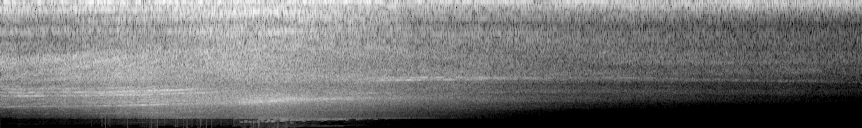

Class: airplane, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


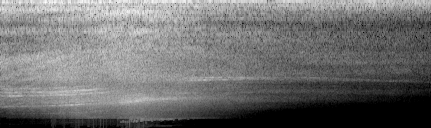

Class: airplane, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


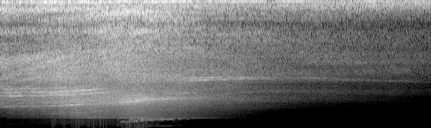

Class: airplane, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


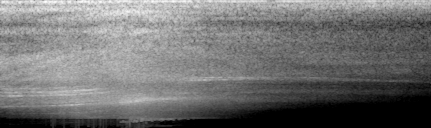

Class: airplane, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


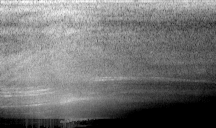

Class: airplane, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


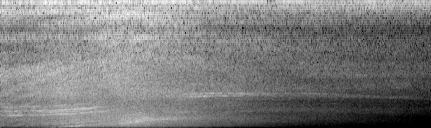

Class: airplane, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


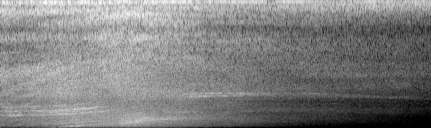

Class: airplane, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


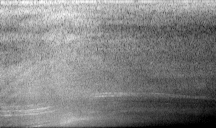

Class: airplane, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


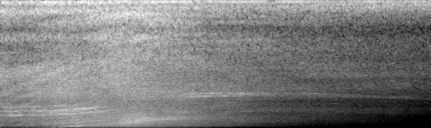

Class: airplane, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


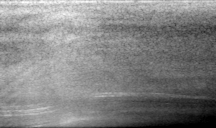

Class: breathing, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


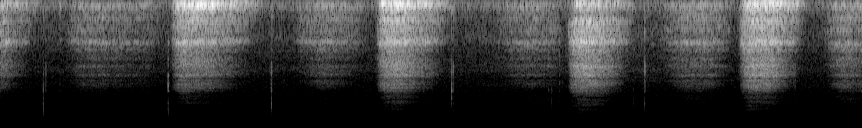

Class: breathing, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


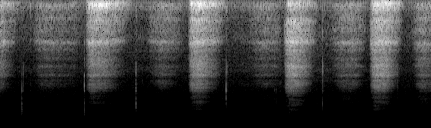

Class: breathing, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


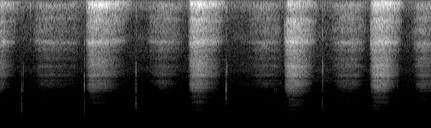

Class: breathing, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


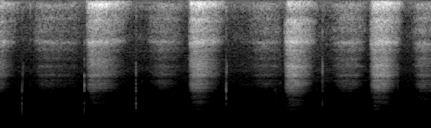

Class: breathing, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


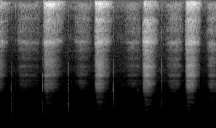

Class: breathing, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


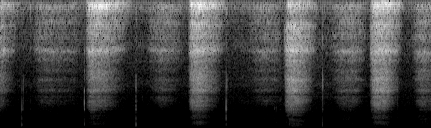

Class: breathing, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


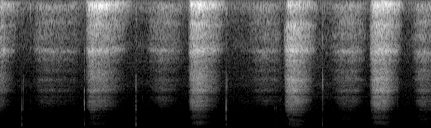

Class: breathing, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


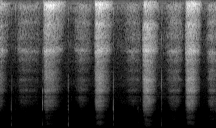

Class: breathing, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


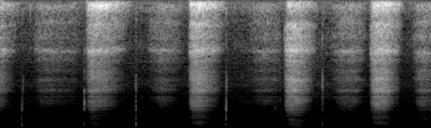

Class: breathing, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


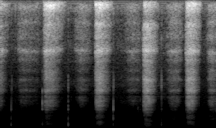

Class: brushing_teeth, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


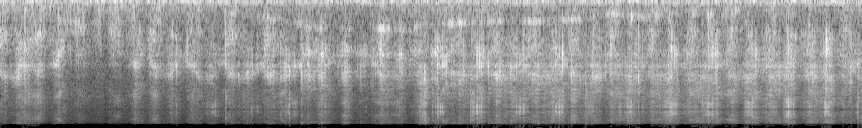

Class: brushing_teeth, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


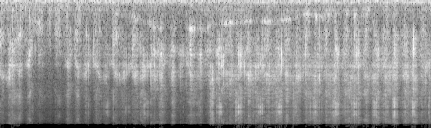

Class: brushing_teeth, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


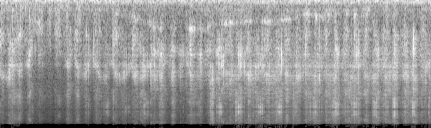

Class: brushing_teeth, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


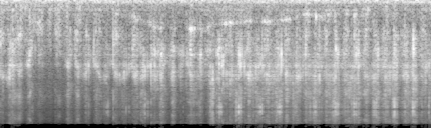

Class: brushing_teeth, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


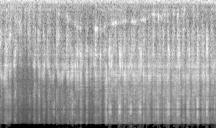

Class: brushing_teeth, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


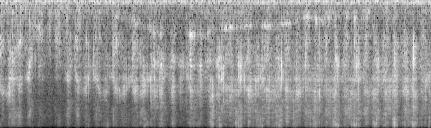

Class: brushing_teeth, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


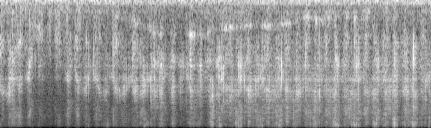

Class: brushing_teeth, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


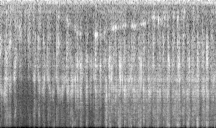

Class: brushing_teeth, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


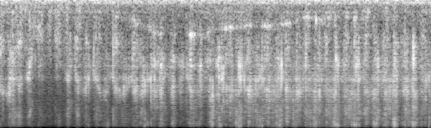

Class: brushing_teeth, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


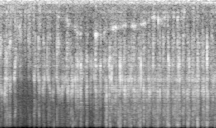

Class: can_opening, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


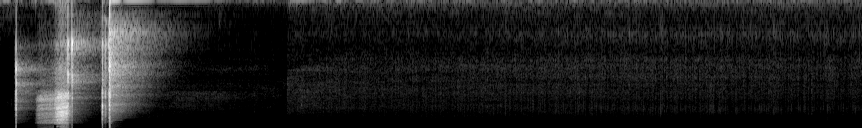

Class: can_opening, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


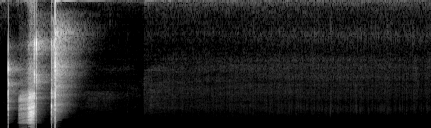

Class: can_opening, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


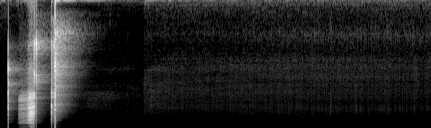

Class: can_opening, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


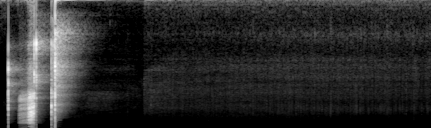

Class: can_opening, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


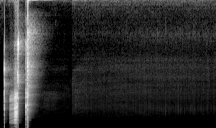

Class: can_opening, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


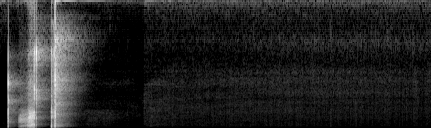

Class: can_opening, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


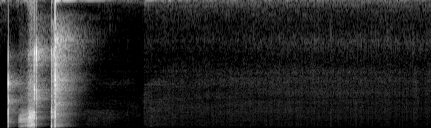

Class: can_opening, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


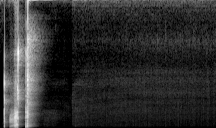

Class: can_opening, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


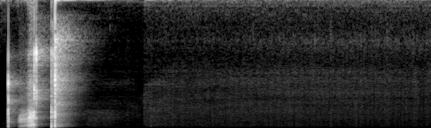

Class: can_opening, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


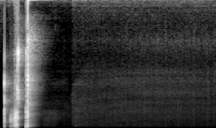

Class: car_horn, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


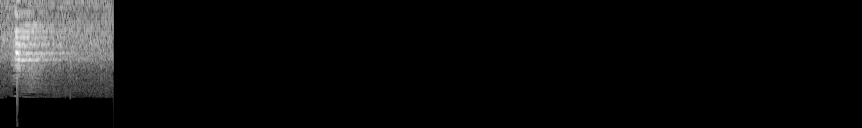

Class: car_horn, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


Class: car_horn, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


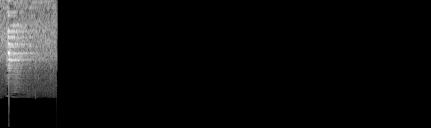

Class: car_horn, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


Class: car_horn, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


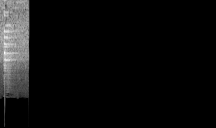

Class: car_horn, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


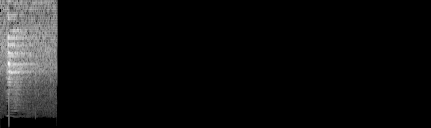

Class: car_horn, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


Class: car_horn, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


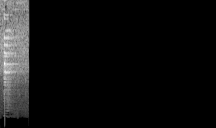

Class: car_horn, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


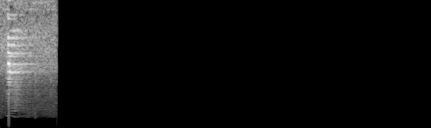

Class: car_horn, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


Class: cat, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


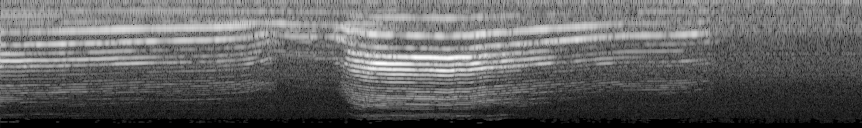

Class: cat, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


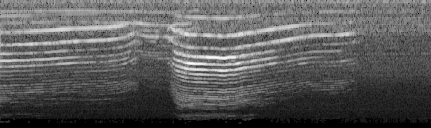

Class: cat, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


Class: cat, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


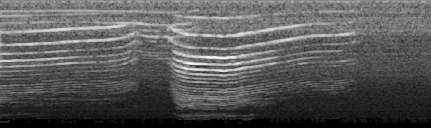

Class: cat, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


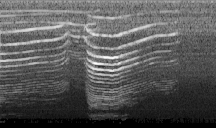

Class: cat, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


Class: cat, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


Class: cat, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


Class: cat, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


Class: cat, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


Class: chainsaw, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


Class: chainsaw, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


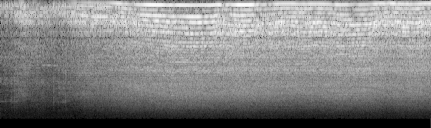

Class: chainsaw, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


Class: chainsaw, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


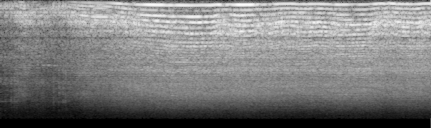

Class: chainsaw, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


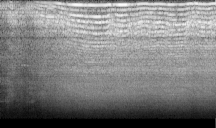

Class: chainsaw, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


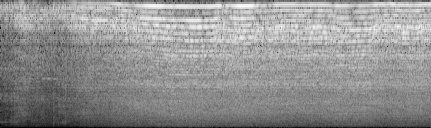

Class: chainsaw, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


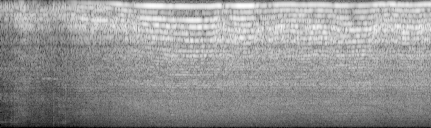

Class: chainsaw, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


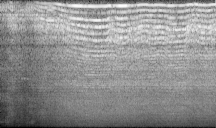

Class: chainsaw, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


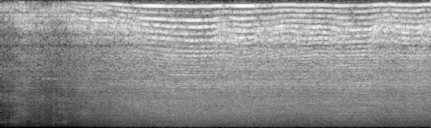

Class: chainsaw, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


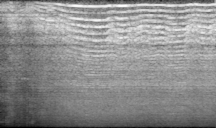

Class: chirping_birds, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


Class: chirping_birds, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


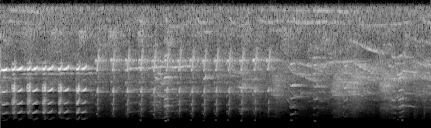

Class: chirping_birds, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


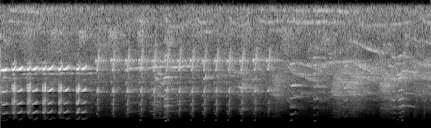

Class: chirping_birds, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


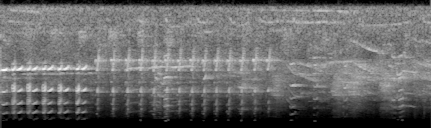

Class: chirping_birds, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


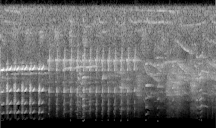

Class: chirping_birds, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


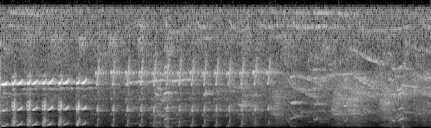

Class: chirping_birds, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


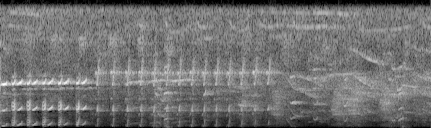

Class: chirping_birds, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


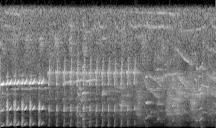

Class: chirping_birds, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


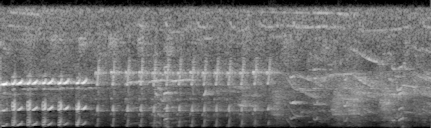

Class: chirping_birds, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


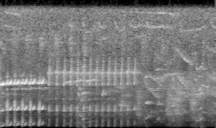

Class: church_bells, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


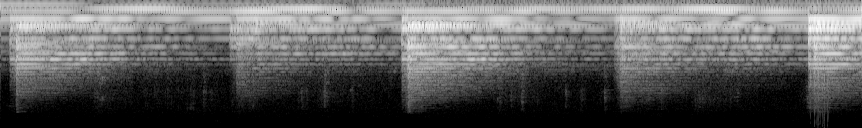

Class: church_bells, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


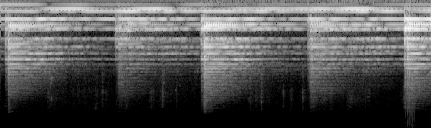

Class: church_bells, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


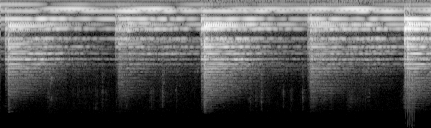

Class: church_bells, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


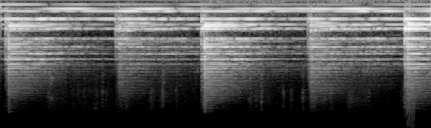

Class: church_bells, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


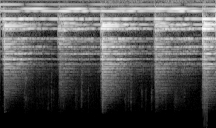

Class: church_bells, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


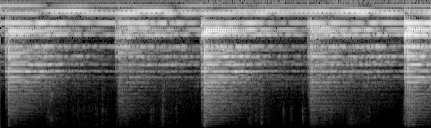

Class: church_bells, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


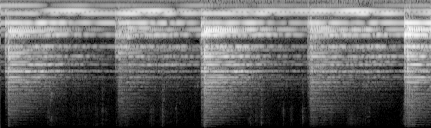

Class: church_bells, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


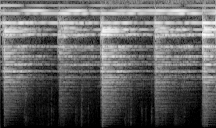

Class: church_bells, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


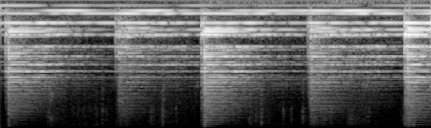

Class: church_bells, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


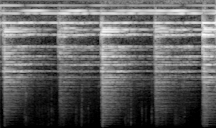

Class: clapping, experiment_no: exp1, shape: (128, 862), parameters=[44100, 1024, 512, 256]


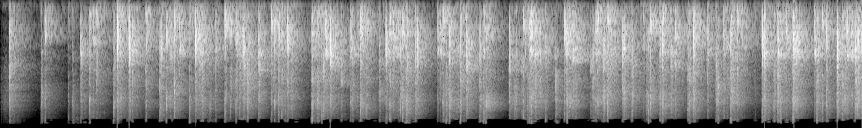

Class: clapping, experiment_no: exp2, shape: (128, 431), parameters=[44100, 1024, 1024, 512]


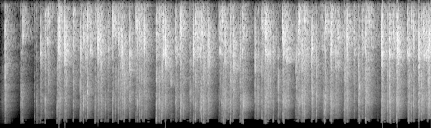

Class: clapping, experiment_no: exp3, shape: (128, 431), parameters=[44100, 2048, 1024, 512]


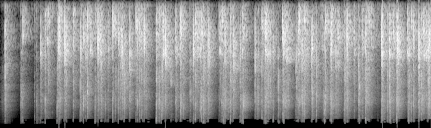

Class: clapping, experiment_no: exp4, shape: (128, 431), parameters=[44100, 2048, 2048, 512]


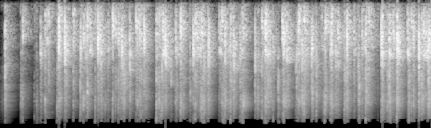

Class: clapping, experiment_no: exp5, shape: (128, 216), parameters=[44100, 2048, 2048, 1024]


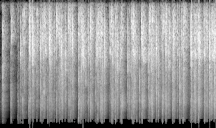

Class: clapping, experiment_no: exp6, shape: (128, 431), parameters=[22050, 512, 512, 256]


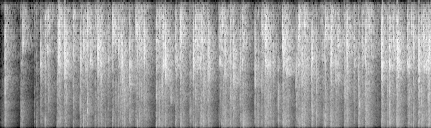

Class: clapping, experiment_no: exp7, shape: (128, 431), parameters=[22050, 1024, 512, 256]


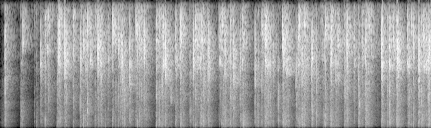

Class: clapping, experiment_no: exp8, shape: (128, 216), parameters=[22050, 1024, 1024, 512]


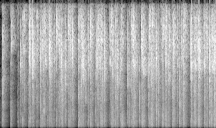

Class: clapping, experiment_no: exp9, shape: (128, 431), parameters=[22050, 2048, 1024, 256]


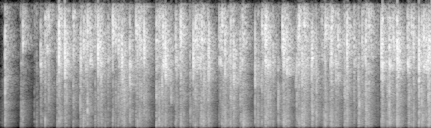

Class: clapping, experiment_no: exp10, shape: (128, 216), parameters=[22050, 2048, 2048, 512]


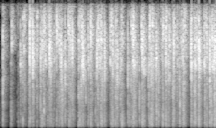

In [0]:
#Main nmles=128
nmels=128# |128 
experiment_path='/content/exp/'
folder=str(nmels)
experiment_path=experiment_path+folder+'/'


for c in classes[0:10]:
  afn = esc50['filename'].loc[esc50['category']==c].iloc[0] #get the first file of the first 10 categories

  for exp in experiments.index:
    sr, nfft, window_size, overlap = experiments.loc[exp] 
    parameters=[sr, nfft, window_size, overlap]     
    image_name=define_imagename_exp(afn,exp)

    spectogram=extract_mel_spectogram(audio_path,afn,sr,window_size,overlap,nfft,nmels)
    image=spec_to_image(spectogram, eps=1e-6)

    save_spec(experiment_path,image_name,image)

    print('Class: {}, experiment_no: {}, shape: {}, parameters={}'.format(c,exp,image.shape,parameters))

    plot_experiments(experiment_path, spectogram, image_name)

In [0]:
#compress the file
!tar -zcvf chose_parameters.tar.gz /content/exp/
!rm -rf /content/exp

In [0]:
#among exp3 and exp10, and exp4, exp4 parameters finally were selected
sr=44100   
nmels=128# |128 
#Chosen Window!(very clear - same size with alt)
window_size=2048   #duration_of_window(secs)=T=WindowSize/SR==46ms , F0=5*(SR/Window Size)=108Hz
nfft=2048	          #fftanalysis_window=WindowSize/SR=46ms
overlap=int(window_size/4)#25%